# Introduction

We have to create a model trained on measurements of health characteristics to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0).

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV Files

In [2]:
# Load the data.
train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
sample_submission_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

In [3]:
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


It appears to be a tabular dataset with 617 rows and 58 columns. Each row represents a sample, and the columns represent different features or attributes of the samples.

In [4]:
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

The provided DataFrame has 617 rows and 58 columns. Here is a summary of the columns and their data types:

    Columns 0 to 57: They contain various numeric features represented as float64 data type.
    Column 58: It contains the target variable, represented as an int64 data type.
    Columns "Id" (column 0) and "EJ" (column 40): They are object data types, which might contain string or categorical values.

The DataFrame contains some missing values in several columns, indicated by the non-null counts that are less than the total number of rows (617). The columns with missing values include "BQ," "CB," "CC," "DU," "EL," "FL," "FS," and "GL."

In [6]:
# It maps the value 'A' to 0 and the value 'B' to 1 using the replace() function. 
train_df['EJ'] = train_df['EJ'].replace({'A': 0, 'B': 1})

The fillna() function is used to **replace missing values with a specified method or value**.

In this case, **the method='ffill' argument specifies that missing values should be filled using the last known non-null value in each column**. This means that missing values will be **replaced with the most recent non-null value in the column**.

After executing this code, the train_df DataFrame will have all missing values filled with the corresponding non-null values from the previous row.

In [7]:
# Replace missing values with the most recent non-null value in the column.
train_df = train_df.fillna(method = 'ffill')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [9]:
train_df['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

The output shows that there are 509 instances with the value 0 and 108 instances with the value 1 in the 'Class' column.

In [10]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The DataFrame 'test_df' contains 5 rows and 57 columns. Each row represents a sample, and each column represents a feature.

Here is a summary of the columns in 'test_df':

    Id: The unique identifier for each sample.
    AB, AF, AH, AM, AR, AX, AY, AZ, BC, ...: Numerical features.
    FI, FL, FR, FS, GB, GE, GF, GH, GI, GL: Numerical features.
    There is no 'Class' column in the 'test_df' DataFrame.

In [11]:
test_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   AB      5 non-null      float64
 2   AF      5 non-null      float64
 3   AH      5 non-null      float64
 4   AM      5 non-null      float64
 5   AR      5 non-null      float64
 6   AX      5 non-null      float64
 7   AY      5 non-null      float64
 8   AZ      5 non-null      float64
 9   BC      5 non-null      float64
 10  BD      5 non-null      float64
 11  BN      5 non-null      float64
 12  BP      5 non-null      float64
 13  BQ      5 non-null      float64
 14  BR      5 non-null      float64
 15  BZ      5 non-null      float64
 16  CB      5 non-null      float64
 17  CC      5 non-null      float64
 18  CD      5 non-null      float64
 19  CF      5 non-null      float64
 20  CH      5 non-null      float64
 21  CL      5 non-null      float64
 22  CR    

The DataFrame 'test_df' has 5 entries (rows) and 57 columns. The data types of the columns are as follows:

    'Id': object
    'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', ...: float64
    'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL': float64

All columns have non-null values, and the memory usage of the DataFrame is approximately 2.4 KB.

In [13]:
# It maps the value 'A' to 0 and the value 'B' to 1 using the replace() function.
test_df['EJ'] = test_df['EJ'].replace({'A': 0, 'B': 1})

Although non-null values are not observed in these test data, **there may be non-null values in the hidden test data**. Thus, we must replace these values with something in advance.

In [14]:
# Replace missing values with the most recent non-null value in the column.
test_df = test_df.fillna(method = 'ffill')

In [15]:
greeks_df

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


Supplemental metadata, only available for the training set.

    Alpha Identifies the type of age-related condition, if present.
        A No age-related condition. Corresponds to class 0.
        B, D, G The three age-related conditions. Correspond to class 1.
    Beta, Gamma, Delta Three experimental characteristics.
    Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

In [16]:
greeks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [17]:
# values of Alpha
values = greeks_df.Alpha.values
unique_values = np.unique(values)
counts = np.bincount(np.searchsorted(unique_values, values))

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

A: 509
B: 61
D: 18
G: 29


In [18]:
# values of Beta
values = greeks_df.Beta.values
unique_values = np.unique(values)
counts = np.bincount(np.searchsorted(unique_values, values))

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

A: 8
B: 202
C: 407


In [19]:
# values of Gamma
values = greeks_df.Gamma.values
unique_values = np.unique(values)
counts = np.bincount(np.searchsorted(unique_values, values))

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

A: 11
B: 18
E: 8
F: 10
G: 8
H: 53
M: 445
N: 64


In [20]:
# values of Delta
values = greeks_df.Delta.values
unique_values = np.unique(values)
counts = np.bincount(np.searchsorted(unique_values, values))

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

A: 75
B: 456
C: 64
D: 22


The code below performs the following operations:

    1. Imports the date and datetime modules from the datetime library.
    2. Creates a copy of the 'Epsilon' column from the 'greeks_df' DataFrame and assigns it to the variable times.
    3. Updates the values in the times column based on the condition greeks_df.Epsilon != 'Unknown'. For the non-'Unknown' values, it uses the map() function to apply a lambda function that converts the string representation of a date to a datetime object using the format '%m/%d/%Y', and then converts it to an ordinal date using the toordinal() method.
    4. Updates the values in the times column based on the condition greeks_df.Epsilon == 'Unknown'. For the 'Unknown' values, it assigns np.nan (representing missing values) to those positions.

Note that in order to run this code, we need to have the necessary dependencies (numpy and pandas) imported and available in our environment.

In [21]:
from datetime import date, datetime
times = greeks_df.Epsilon.copy()
times[greeks_df.Epsilon != 'Unknown'] = greeks_df.Epsilon[greeks_df.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
times[greeks_df.Epsilon == 'Unknown'] = np.nan

In [22]:
times

0      737137.0
1           NaN
2           NaN
3           NaN
4      737509.0
         ...   
612    737681.0
613    737676.0
614    737264.0
615    737090.0
616         NaN
Name: Epsilon, Length: 617, dtype: object

In [23]:
#train_df['Epsilon'] = times
#train_df

In [24]:
#class_col = train_df.pop('Class')
#train_df['Class'] = class_col
#train_df

The 'Epsilon' column in the 'train_df' DataFrame is updated with the values from the times variable. Then, the DataFrame columns are rearranged to move the 'Epsilon' column to the second-to-last position, just before the 'Class' column.

In [25]:
sample_submission_df

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


The sample_submission_df DataFrame represents the sample submission format for the competition. It includes three columns: 'Id', 'class_0', and 'class_1'. The 'Id' column contains the unique identifiers for each sample, and the 'class_0' and 'class_1' columns contain the predicted probabilities for the corresponding classes.

The sample submission DataFrame provided here has '0.5' as the predicted probability for both 'class_0' and 'class_1' for all the samples.

To submit our actual predictions, we have to **replace the '0.5' values with the respective probabilities we obtain from our model**. Ensure that **the 'Id' column matches the identifiers** in the test dataset, and **the probabilities in 'class_0' and 'class_1' sum up to 1 for each sample**.

# Create Dataset without Features Selection

In [26]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

In [27]:
# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, Train, and Evaluate Model without Features Selection

In [29]:
from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

# Evaluate the model on the test data.
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.967741935483871


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predictions using the model on the test data.
y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.83      0.90        23

    accuracy                           0.97       124
   macro avg       0.98      0.91      0.94       124
weighted avg       0.97      0.97      0.97       124

Confusion Matrix:
[[101   0]
 [  4  19]]


Text(50.722222222222214, 0.5, 'Truth')

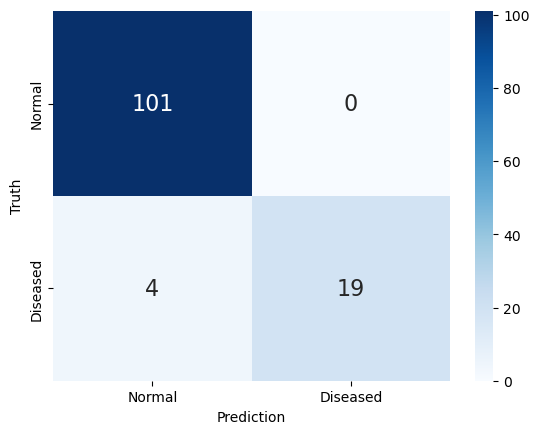

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Define the class names.
class_names = ['Normal', 'Diseased']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

# Create Dataset with Univariate Feature Selection

To perform Univariate Feature Selection, we can use **the SelectKBest class from the scikit-learn library**. we are using **the F-test score (f_regression)** as the scoring function **to rank the features**. We are **selecting the top 10 features** based on this score (k=10). Once we fit the selector on the independent variables and target variable, we can get the indices and names of the selected features using the get_support and columns methods, respectively.

In [32]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features based on the F-test score.
selector = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X.fillna(method = 'ffill', inplace = True)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features.
selected_indices = selector.get_support(indices = True)

# Get the names of the selected features.
selected_X = X.columns[selected_indices]

In [34]:
# the selected features
X_new

array([[2.09377000e-01, 3.10903329e+03, 2.23944070e+01, ...,
        5.31069000e+00, 9.02829192e+03, 7.29816194e+00],
       [1.45282000e-01, 9.78764160e+02, 3.69688890e+01, ...,
        5.51760000e-03, 6.78500347e+03, 1.73229000e-01],
       [4.70030000e-01, 2.63510654e+03, 3.23605530e+01, ...,
        1.28973900e+00, 8.33890618e+03, 7.70956011e+00],
       ...,
       [4.27300000e-01, 2.45910720e+03, 5.53557780e+01, ...,
        5.51760000e-03, 5.08892291e+03, 1.73229000e-01],
       [3.63205000e-01, 1.26353524e+03, 2.36858560e+01, ...,
        5.10378000e-01, 6.46425083e+03, 9.25699588e+00],
       [4.82849000e-01, 2.67253426e+03, 1.12006102e+02, ...,
        5.51760000e-03, 5.89535226e+03, 1.73229000e-01]])

In [35]:
# the selected features
selected_X

Index(['AB', 'AF', 'AM', 'BQ', 'CR', 'DH', 'DI', 'DU', 'FE', 'FL'], dtype='object')

In [36]:
# the selected features
selected_X.values

array(['AB', 'AF', 'AM', 'BQ', 'CR', 'DH', 'DI', 'DU', 'FE', 'FL'],
      dtype=object)

In [37]:
# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, Train, and Evaluate Model with Univariate Feature Selection

In [39]:
from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

# Evaluate the model on the test data.
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9516129032258065


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predictions using the model on the test data.
y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       101
           1       0.90      0.83      0.86        23

    accuracy                           0.95       124
   macro avg       0.93      0.90      0.92       124
weighted avg       0.95      0.95      0.95       124

Confusion Matrix:
[[99  2]
 [ 4 19]]


Text(50.722222222222214, 0.5, 'Truth')

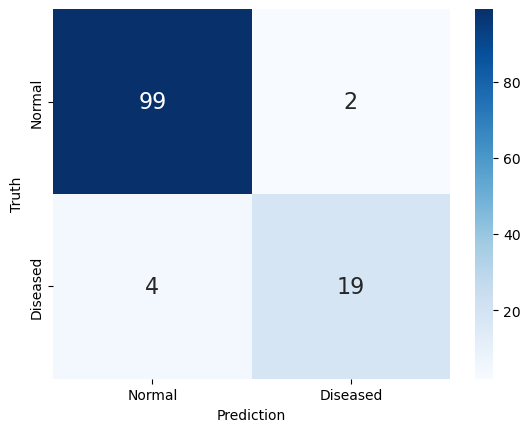

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Define the class names.
class_names = ['Normal', 'Diseased']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

**The model performance after the features selection is not so good as that without the features selection. Thus, it does not seem better to conduct features selection in this case.**

# Train the Model for Submission

In [42]:
# Replace with the actual column names.
#selected_indices = [test_df.columns.get_loc(col) for col in selected_X]
#X = train_df.iloc[:, selected_indices].values

In [43]:
# Standardize the independent variables.
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Prediction

In [44]:
# Create the test dataset.
X_test = test_df.iloc[:, 1:]
#X_test = X_test.iloc[:, selected_indices].values

# Standardize the independent variables.
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Predict the results.
y_pred = model.predict_proba(X_test)

In [45]:
y_pred

array([[0.99286306, 0.00713696],
       [0.99286306, 0.00713696],
       [0.99286306, 0.00713696],
       [0.99286306, 0.00713696],
       [0.99286306, 0.00713696]], dtype=float32)

In [46]:
y_pred_df = pd.DataFrame(y_pred, columns = ['0', '1'])
y_pred_df

,0,1
0,0.992863,0.007137
1,0.992863,0.007137
2,0.992863,0.007137
3,0.992863,0.007137
4,0.992863,0.007137


# Submission

In [47]:
submission = pd.DataFrame(test_df["Id"], columns = ["Id"])

In [48]:
submission["class_0"] = y_pred_df['0']
submission["class_1"] = y_pred_df['1']

In [49]:
submission

,Id,class_0,class_1
0,00eed32682bb,0.992863,0.007137
1,010ebe33f668,0.992863,0.007137
2,02fa521e1838,0.992863,0.007137
3,040e15f562a2,0.992863,0.007137
4,046e85c7cc7f,0.992863,0.007137


In [50]:
submission.to_csv('submission.csv',index = False)

# Save, Load, and Use the Model¶

To save the trained model, we can use the joblib library from the sklearn.externals module. This will save the model to a file in the current working directory. **To load the saved model later**, we can use the joblib.load() function.


In [51]:
import joblib

# Save the model to disk.
joblib.dump(model, 'model.joblib')

# Load the saved model from disk.
model_loaded = joblib.load('model.joblib')

# Use the loaded model to make predictions on test data.
y_pred_loaded = model_loaded.predict(X_test)

# Conclusion

For the train dataset, this model performed very well, but did not get a good score for the test dataset. Therefore, there must be some difference between the train and test datasets and overfitting is observed to the train dataset.

I am a medical doctor working on **artificial intelligence (AI) for medicine**. At present AI is also widely used in the medical field. Particularly, AI performs in the healthcare sector following tasks: **image classification, object detection, semantic segmentation, GANs, text classification, etc**. **If you are interested in AI for medicine, please see my other notebooks.**